## Ecuaciones Diferenciales Parciales Parabólicas
#### Problema:

Resuelva el siguiente sistema:


$$\frac{\partial u}{\partial t}=5 \frac{\partial^2u}{\partial x^2} , \quad 0 \leq x \leq 2, \quad 0 \leq t \leq 0.25;$$

Con la condición inicial: $$u(x,0) = 5;$$

y las condiciones de frontera: $$u(0,t) = 0, \quad u(2,t) =  0$$

#### Solución:

In [92]:
# librerías necesarias
import numpy as np
from archivos.latex_archivos import ltx_matriz
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [93]:
# Inicialización de variables
Δx = 0.25 # valor que asumieremos 
Δt = 0.002 # valor que asumieremos 

t0 = 0  # valor inferior de t
tf = 0.25  # valor superior de t
x0 = 0  # valor inferior de x
xf = 2  # valor superior de x

k = 5 # coeficiente del término cuadrático  

# Valores que definen la frontera

uxI = 5  # valor inferior de x

utI = 0  # valor inferior de t
utS = 0  # valor superior de t

Revisión de los $\Delta$ iniciales:

In [94]:
cvg = Δx ** 2 / (2 * k)
λ = k *  Δt / (Δx) ** 2
convergencia = "Hay convergencia" if cvg > Δt and λ < 0.5 else "No hay convergencia, cambie el valor de Δt"  
convergencia

'Hay convergencia'

Cálculo de la matriz inicial:

In [95]:
n = int((xf - x0) / Δx + 1)  # número de filas de la matriz
m = int((tf - t0) / Δt + 1)  # número de columnas

x = np.arange(x0, xf + Δx, Δx)
t = np.arange(t0, tf + Δt, Δt)

a = np.zeros([n, m])
b = np.zeros([n, m])

# matriz exterior  
for i in range(n):
    a[i, 0] = uxI     
    
for i in range(m):
    a[0, i] = utI

for i in range(m):
    a[-1, i] = utS

a = a[:: -1]
ltx_matriz(a,"Minicial")

<IPython.core.display.Math object>

Iterraciones:

In [96]:
for j in range(m - 1):
    for i in range(n - 2):
        a[i + 1, j + 1 ] = a[i + 1, j] + λ * (a[i + 2, j] - 2 * a[i + 1, j] + a[i, j])

ltx_matriz(np.round(a,4),"Msol")

<IPython.core.display.Math object>

Gráfico:

In [97]:
T, X = np.meshgrid(t, x)
a = a[:: -1]

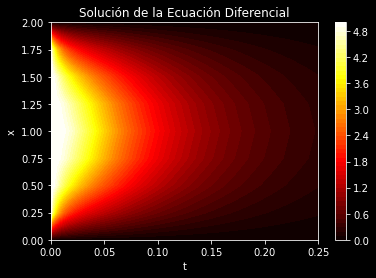

In [98]:
plt.contourf(T, X, a, 50, cmap = 'hot')
plt.title("Solución de la Ecuación Diferencial")
plt.xlabel('t')
plt.ylabel('x')
plt.colorbar()